## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\client_data.csv')

----

## Gain General Understanding of Dataset

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [6]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [7]:
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_activ'] = pd.to_datetime(df['date_activ'])

### Check Duplicates

In [8]:
df[df.duplicated(['id'])]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


#### No duplicates were found in the ID column, operating under the assumption that the same company will not be marked twice with different IDs.

In [9]:
len(df.loc[df['churn'] == 1]) / len(df.loc[df['churn'] == 0])*100

10.760597558201258

#### ~10.76% of companies churn in total.

---
---
# Begin Analysis
---
---

## Pearson Correlation Heatmap

In [10]:
df.corr().style.background_gradient(cmap="Greens")

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


#### None of the columns show a significant correlation with Churn
----

Probably delete this part

In [11]:
mask = (df['date_end'] > np.datetime64('2016-01-01')) & (df['date_end'] <= np.datetime64('2016-03-31'))
dfContractEnds = df.loc[mask]

mask = (df['date_end'] < np.datetime64('2016-01-01')) | (df['date_end'] > np.datetime64('2016-03-31'))
dfOutOfContract = df.loc[mask]

In [12]:
sns.set(style="whitegrid")

## Visualizing the relationship between contract start/end dates and Churn

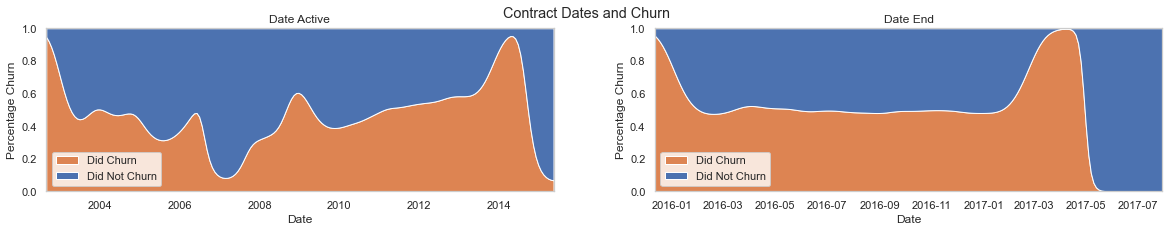

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (20, 3))
fig.suptitle('Contract Dates and Churn')

axes[0].set_title('Date Active')
ax = sns.kdeplot(data=df, x="date_activ", hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[0])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Date End')
ax = sns.kdeplot(data=df, x="date_end", hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### There is no visual indication of a relationship between a contract's activation date and the possibility of churn.
#### On the other hand, their is visual indication of a potential relationship between date of a contract's end and the possibility of churn.
---

## Effect of Margin on Churn Visualized

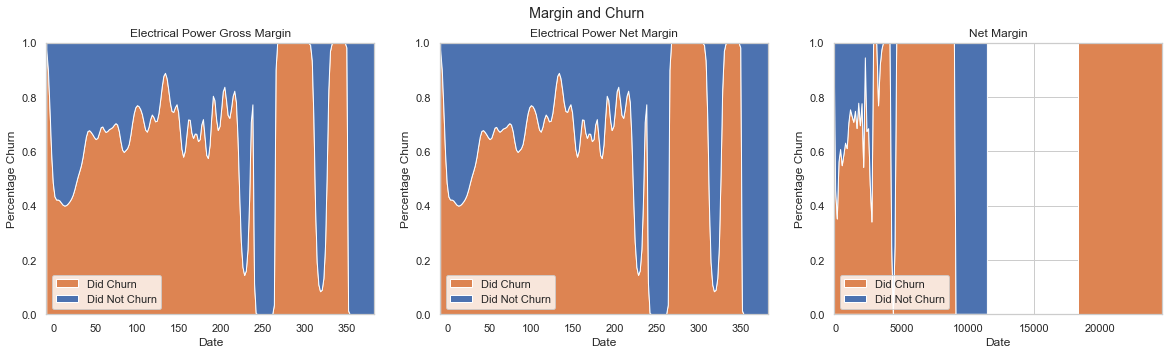

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Margin and Churn')

axes[0].set_title('Electrical Power Gross Margin')
ax = sns.kdeplot(data=df, x='margin_gross_pow_ele', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[0])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Electrical Power Net Margin')
ax = sns.kdeplot(data=df, x='margin_net_pow_ele', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[2].set_title('Net Margin')
ax = sns.kdeplot(data=df, x='net_margin', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[2])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

In [15]:
df['net_margin'].loc[df['net_margin'] >15000]

2596    24570.65
Name: net_margin, dtype: float64

#### Margin does not show any correlation with churn until the 20,000 mark but there is not enough data at this level to come to any concrete conclusions.
----